In [6]:
from sympy import *

init_printing(pretty_print=true)

from sympy.vector import CoordSys3D
N = CoordSys3D('N')

import scipy.integrate as integ
import mpmath as mp

import numpy as np

In [7]:
#CALCULO DE CAMPO MAGNETICO GENERADO POR UNA HELICE, PRESENTACION DEL MODELO 
#Radio helice
R= var('R')

#Espaciamiento
a= var('a')

#Variables
phi = Symbol('phi') #Unico parametro de la curva

#Curva parametrizada,  helice
c = R*cos(phi)*N.i+R*sin(phi)*N.j+(a/(2*pi))*phi*N.k

#vector tangente diferencial
l= c.diff(phi)

#Posicion de medicion
x=var('x');y=var('y');z=var('z');
r= x*N.i+y*N.j+z*N.k

#Corriente
I = var('I')

#Permeabilidad del vacio
mu = var('\mu_{0}')

#Diferencia entre posicion de medicion y posicion fuente
eta = r - c

In [8]:
#CAMBO GENERADO POR CORRIENTE QUE CIRCULA POR C
INT= Integral(((l.cross(eta))/((sqrt(eta.dot(eta)))**3)),(phi,-200*pi,200*pi))

Br=((mu*I)/(4*pi))*INT

In [9]:
Br.simplify()

latex(Br)

'(\\frac{I \\mu_{0} \\int\\limits_{- 200 \\pi}^{200 \\pi} \\frac{R \\left(- \\frac{a \\phi}{2 \\pi} + z\\right) \\cos{\\left(\\phi \\right)} + \\frac{a \\left(R \\sin{\\left(\\phi \\right)} - y\\right)}{2 \\pi}}{\\left(\\left(- R \\sin{\\left(\\phi \\right)} + y\\right)^{2} + \\left(- R \\cos{\\left(\\phi \\right)} + x\\right)^{2} + \\left(- \\frac{a \\phi}{2 \\pi} + z\\right)^{2}\\right)^{\\frac{3}{2}}}\\, d\\phi}{4 \\pi})\\mathbf{\\hat{i}_{N}} + (\\frac{I \\mu_{0} \\int\\limits_{- 200 \\pi}^{200 \\pi} \\frac{- R \\left(\\frac{a \\phi}{2 \\pi} - z\\right) \\sin{\\left(\\phi \\right)} + \\frac{a \\left(- R \\cos{\\left(\\phi \\right)} + x\\right)}{2 \\pi}}{\\left(\\left(- R \\sin{\\left(\\phi \\right)} + y\\right)^{2} + \\left(- R \\cos{\\left(\\phi \\right)} + x\\right)^{2} + \\left(- \\frac{a \\phi}{2 \\pi} + z\\right)^{2}\\right)^{\\frac{3}{2}}}\\, d\\phi}{4 \\pi})\\mathbf{\\hat{j}_{N}} + (\\frac{I \\mu_{0} \\int\\limits_{- 200 \\pi}^{200 \\pi} \\frac{- R \\left(- R \\sin{\\left(\\p

In [10]:
#CON VARIABLES DEFINIDAS PARA RESOLVER EL MODELO
#R= 0.045 #m
#Diametro Interno
D=0.0433
R1=D/2

#Diametro externo
D2=0.0595
R2=D2/2

R=(R1+R2)/2
print(R)
#Espaciamiento
a = 0.002 #m

#Curva parametrizada,  helice
c = R*cos(phi)*N.i+R*sin(phi)*N.j+(a/(2*pi))*phi*N.k

#vector tangente diferencial
l= c.diff(phi)

#COrriente
#I = 500*10**(-6) #Ampere

#Permeabilidad del vacio
mu = 4*pi*10**(-7)

#Medicion
r= x*N.i+y*N.j+z*N.k

#Diferencia entre posicion de medicion y posicion fuente
eta = r - c

0.0257


In [11]:
INT=((l.cross(eta))/((sqrt(eta.dot(eta)))**3))

Br=((mu*I)/(4*pi))*Integral(INT,(phi,-200*pi,200*pi))

INTx= INT.dot(N.i)

INTy= INT.dot(N.j)

INTz= INT.dot(N.k)

In [12]:
#FUNCION PARA CALCULAR EL CAMPO CREADO POR EL HELICOIDE EN PUNTOS X,Y,Z

def CampoB(x,y,z):
        #PUNTO de Medicion
        r= x*N.i+y*N.j+z*N.k
        
        #Diferencia entre posicion de medicion y posicion fuente
        eta = r - c
        
        INT=((l.cross(eta))/((sqrt(eta.dot(eta)))**3))
        
        INTx= INT.dot(N.i)
        INTy= INT.dot(N.j)
        INTz= INT.dot(N.k)
        
        intX= lambdify (phi, INTx, 'mpmath')
        intY= lambdify (phi, INTy, 'mpmath')
        intZ= lambdify (phi, INTz, 'mpmath')

        Ix=sympify(mp.quad(intX,[-200*mp.pi,200*mp.pi]))
        Iy=sympify(mp.quad(intY,[-200*mp.pi,200*mp.pi]))
        Iz=sympify(mp.quad(intZ,[-200*mp.pi,200*mp.pi]))
        
        #Permeabilidad del vacio
        mu = 4*pi*10**(-7)

        K=(mu*I)/(4*pi).evalf()

        Bx=K*Ix.evalf()
        Bxer=K*Ix
        
        By=K*Iy.evalf()
        Byer=K*Iy

        Bz=K*Iz.evalf()
        Bzer=K*Iz
        B=Bx*N.i+By*N.j+Bz*N.k 
        print(Bzer.evalf()/2)
        return B

In [13]:
def intX(phi,x,y,z):
     return (-0.0005*(y - 0.045*sin(phi))/pi + 0.045*(-0.0005*phi/pi + z)*cos(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)
    
def intY(phi,x,y,z):
     return (0.0005*(x - 0.045*cos(phi))/pi + 0.045*(-0.0005*phi/pi + z)*sin(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)
    
def intZ(phi,x,y,z):
     return (-0.045*(x - 0.045*cos(phi))*cos(phi) - 0.045*(y - 0.045*sin(phi))*sin(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)

def Berr(x,y,z):
    K=(mu*I)/(4*pi).evalf()
    Ix=integ.quad(intX,-50*pi,50*pi,args=(x,y,z))

    Iy=integ.quad(intY,-50*pi,50*pi,args=(x,y,z))

    Iz=integ.quad(intZ,-50*pi,50*pi,args=(x,y,z))

    Bx=K*Ix[0]
    Bxer=K*Ix[1]

    By=K*Iy[0]
    Byer=K*Iy[1]

    Bz=K*Iz[0]
    Bzer=K*Iz[1]
    
    B=Bx*N.i+By*N.j+Bz*N.k
    
    Ber=Bxer*N.i+Byer*N.j+Bzer*N.k
    return B,Ber

In [21]:
I=0.4*10**-6
#I=40*10**-3
b=CampoB(0,0,0)
b2=Berr(0,0,0)

print(b/2)
print(b2)

1.24638885132118e-10
(-4.15852095967246e-13*pi)*N.j + (3.96737893404792e-11*pi)*N.k
((2.10019178492284e-13*pi)*N.j + (7.77028689885811e-11*pi)*N.k, (1.53987543490175e-25*pi)*N.i + (7.36187008726727e-24*pi)*N.j + (2.37070563044335e-23*pi)*N.k)


In [78]:
II=np.linspace(1.7e-6,0.17*10**-6,100)
Nn=np.size(II)
print(II,Nn)
BI=[]

for p in range(0,Nn):
    I=II[p]
    print(I)
    b=CampoB(0,0,0)
    BI.append(b)


[1.70000000e-06 1.68454545e-06 1.66909091e-06 1.65363636e-06
 1.63818182e-06 1.62272727e-06 1.60727273e-06 1.59181818e-06
 1.57636364e-06 1.56090909e-06 1.54545455e-06 1.53000000e-06
 1.51454545e-06 1.49909091e-06 1.48363636e-06 1.46818182e-06
 1.45272727e-06 1.43727273e-06 1.42181818e-06 1.40636364e-06
 1.39090909e-06 1.37545455e-06 1.36000000e-06 1.34454545e-06
 1.32909091e-06 1.31363636e-06 1.29818182e-06 1.28272727e-06
 1.26727273e-06 1.25181818e-06 1.23636364e-06 1.22090909e-06
 1.20545455e-06 1.19000000e-06 1.17454545e-06 1.15909091e-06
 1.14363636e-06 1.12818182e-06 1.11272727e-06 1.09727273e-06
 1.08181818e-06 1.06636364e-06 1.05090909e-06 1.03545455e-06
 1.02000000e-06 1.00454545e-06 9.89090909e-07 9.73636364e-07
 9.58181818e-07 9.42727273e-07 9.27272727e-07 9.11818182e-07
 8.96363636e-07 8.80909091e-07 8.65454545e-07 8.50000000e-07
 8.34545455e-07 8.19090909e-07 8.03636364e-07 7.88181818e-07
 7.72727273e-07 7.57272727e-07 7.41818182e-07 7.26363636e-07
 7.10909091e-07 6.954545

In [96]:
#RESOLVER EN UNA GRILLA 2D
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nx = 11
Nz = 11

boxSizeX = .01
boxSizeZ = .20

dx = boxSizeX / Nx
dz = boxSizeZ / Nz

#X, Y, Z = np.meshgrid( np.linspace(-boxSizeX+0.5*dx, boxSizeX-0.5*dx, Nx), np.linspace(-boxSizeY+0.5*dy, boxSizeY-0.5*dy, Ny),np.linspace(-boxSizeZ+0.5*dz, boxSizeZ-0.5*dz, Nz))

XX, ZZ = np.meshgrid( np.linspace(-boxSizeX, boxSizeX, Nx),np.linspace(-boxSizeZ, boxSizeZ, Nz))

print(np.size(XX),np.size(ZZ))
print("finished")

#DEFINIR y
y=0

121 121
finished


In [97]:
ZZ

array([[-0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
        -0.2 , -0.2 ],
       [-0.16, -0.16, -0.16, -0.16, -0.16, -0.16, -0.16, -0.16, -0.16,
        -0.16, -0.16],
       [-0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12,
        -0.12, -0.12],
       [-0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08,
        -0.08, -0.08],
       [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
        -0.04, -0.04],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ],
       [ 0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,
         0.04,  0.04],
       [ 0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,
         0.08,  0.08],
       [ 0.12,  0.12,  0.12,  0.12,  0.12,  0.12,  0.12,  0.12,  0.12,
         0.12,  0.12],
       [ 0.16,  0.16,  0.16,  0.16,  0.16,  0.16,  0.16,  0.16,  0.16,
         0.16,  0.16],
       [ 0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.

In [98]:
#CALCULAR EN 2D
Ulist=[]; Plist=[]; USS = []; PSS =[]; 
for i in range(0,Nx):
    nn=0
    if i==0:
                for k in range(0,Nz):
                    nn=nn+1
                    
                    x=float(XX[i,k])
                    
                    z=float(ZZ[i,k])
                    
                    B=CampoB(x,y,z)
                    
                    bx=float(B.dot(N.i))
                    bz=float(B.dot(N.k))
                    
                          
                    Ulist.append(bx)
                    Plist.append(bz)
            
            
                U0=np.array(Ulist)
                P0=np.array(Plist)
                
                Uss = np.zeros(nn)
                Pss = np.zeros(nn) 
                
            #Une los array filas en un nuevo array
                Uss = np.stack((Uss,U0))
                Pss = np.stack((Pss,P0))
                
            #Elimina los valores de la lista
                Ulist=[]; Plist=[]
                print(i+1,'de',Nx)
    else:
                for k in range(0,Nz):
                    #print(i,j,k)
                    nn=nn+1
                    B=CampoB(XX[i,k],y,ZZ[i,k])
                    
                    bx=float(B.dot(N.i))
                    bz=float(B.dot(N.k))
                    print('Pos.X=',XX[i,k],'CampoX=',bx,'Pos.Z=',ZZ[i,k],'CampoZ=',bz)           
                    Ulist.append(bx)
                    Plist.append(bz)
                    
                Us=np.array([Ulist])
                Ps=np.array([Plist])
                
                #Une los array filas en un nuevo array
                Uss = np.append(Uss, Us,axis=0)
                Pss = np.append(Pss, Ps,axis=0)
                
                
               #Elimina los valores de la lista
                Ulist=[]; Plist=[]
                print(i+1,'de',Nx)
                
USS = np.delete(Uss,0,0)
PSS = np.delete(Pss,0,0)
print('FIN')

5.43350634617922e-11
5.40236423133873e-11
5.37363353712136e-11
5.35111430903937e-11
5.33640662919621e-11
5.32971813584334e-11
5.33032197248827e-11
5.33678969201512e-11
5.34710977192969e-11
5.35877257769800e-11
5.36889189271268e-11
1 de 11
8.97760333085860e-11
Pos.X= -0.01 CampoX= -4.3182563334569275e-12 Pos.Z= -0.16 CampoZ= 8.977603330858601e-11
9.26377658796724e-11
Pos.X= -0.008 CampoX= -4.53432709009791e-12 Pos.Z= -0.16 CampoZ= 9.263776587967245e-11
9.48211734436411e-11
Pos.X= -0.006 CampoX= -4.80650656202432e-12 Pos.Z= -0.16 CampoZ= 9.48211734436411e-11
9.64126184521806e-11
Pos.X= -0.004 CampoX= -5.115066197202853e-12 Pos.Z= -0.16 CampoZ= 9.641261845218056e-11
9.75081836464445e-11
Pos.X= -0.002 CampoX= -5.444680750126349e-12 Pos.Z= -0.16 CampoZ= 9.750818364644453e-11
9.82036819232313e-11
Pos.X= 0.0 CampoX= -5.783029505531811e-12 Pos.Z= -0.16 CampoZ= 9.820368192323129e-11
9.85843704719311e-11
Pos.X= 0.002 CampoX= -6.119178383063384e-12 Pos.Z= -0.16 CampoZ= 9.858437047193108e-11
9.871

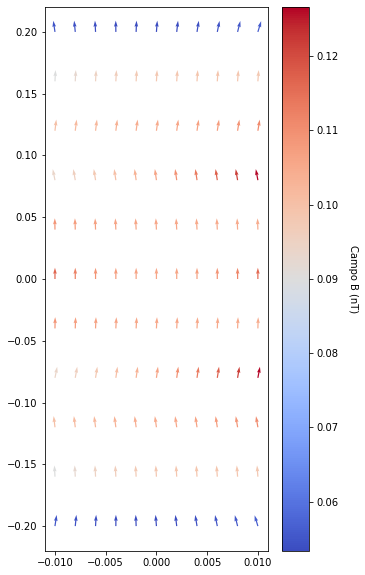

In [109]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
k=10**9
M = np.sqrt(USS**2+PSS**2)*k
UX= USS/M
PZ= PSS/M



fig=plt.figure(figsize=(5,10))
qq= plt.quiver(XX, ZZ, UX, PZ, M ,cmap=plt.cm.coolwarm)
#qq= plt.contourf(XX, ZZ, M ,cmap=plt.cm.coolwarm)
cbar = plt.colorbar(qq, cmap=plt.cm.jet)
cbar.set_label('Campo B (nT)',rotation=270,labelpad=20)
ax = plt.gca()

plt.draw()
    
plt.savefig("Campo_interno_modelo.pdf", dpi=500)

plt.show()

In [101]:
#RESOLVER EN UNA GRILLA 3D
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nx = 9
Ny = 9
Nz = 9
boxSizeX = .04
boxSizeY = .04
boxSizeZ = .20

#dx = boxSizeX / Nx
#dy = boxSizeY / Ny
#dz = boxSizeZ / Nz

dx = .01
dy = .01
dz = .01

vol = dx*dy*dz
#X, Y, Z = np.meshgrid( np.linspace(-boxSizeX+0.5*dx, boxSizeX-0.5*dx, Nx), np.linspace(-boxSizeY+0.5*dy, boxSizeY-0.5*dy, Ny),np.linspace(-boxSizeZ+0.5*dz, boxSizeZ-0.5*dz, Nz))

X, Y, Z = np.meshgrid( np.linspace(-boxSizeX, boxSizeX, Nx), np.linspace(-boxSizeY, boxSizeY, Ny),np.linspace(-boxSizeZ, boxSizeZ, Nz))

print("finished")

finished


In [103]:
##CALCULAR EN 3D
for i in range(0,Nx):
    #xlist=[]; ylist=[] ; zlist=[] ; 
    Ulist=[]; Vlist=[]; Plist=[]
    if (i==0):
        n=0
        for j in range(0,Ny):
            nn=0
            if (j==0):
                for k in range(0,Nz):
                    #print(i,j,k)
#                    x=X[i,j,k]
#                    y=Y[i,j,k]
#                    z=Z[i,j,k]
                    nn=nn+1
                    
                    #xlist.append(x)
                    #ylist.append(y)
                    #zlist.append(z)
                    
                    B=CampoB(X[i,j,k],Y[i,j,k],Z[i,j,k])
                    
                    bx=float(B.dot(N.i))
                    by=float(B.dot(N.j))
                    bz=float(B.dot(N.k))
                             
                    Ulist.append(bx)
                    Vlist.append(by)
                    Plist.append(bz)
            
                U0=np.array(Ulist)
                V0=np.array(Vlist)
                P0=np.array(Plist)
                
                Uss = np.zeros(nn)
                Vss = np.zeros(nn)
                Pss = np.zeros(nn) 
                
            #Une los array filas en un nuevo array
                Uss = np.stack((Uss,U0))
                Vss = np.stack((Vss,V0))
                Pss = np.stack((Pss,P0))
                
            #Elimina los valores de la lista
                Ulist=[]; Vlist=[]; Plist=[]
    
            else:
                for k in range(0,Nz):
                    #print(i,j,k)
                    B=CampoB(X[i,j,k],Y[i,j,k],Z[i,j,k])
                    
            
                    bx=float(B.dot(N.i))
                    by=float(B.dot(N.j))
                    bz=float(B.dot(N.k))
                             
                    Ulist.append(bx)
                    Vlist.append(by)
                    Plist.append(bz)
                
                Us=np.array([Ulist])
                Vs=np.array([Vlist])
                Ps=np.array([Plist])
                
                #Une los array filas en un nuevo array
                Uss = np.append(Uss, Us,axis=0)
                Vss = np.append(Vss, Vs,axis=0)
                Pss = np.append(Pss, Ps,axis=0)
                
                
               #Elimina los valores de la lista
                Ulist=[]; Vlist=[]; Plist=[]
            n=n+1
            
        
        Uss = np.delete(Uss,0,0)
        Vss = np.delete(Vss,0,0)
        Pss = np.delete(Pss,0,0)
        
        Uz = np.zeros((n,n))
        Vz = np.zeros((n,n))
        Pz = np.zeros((n,n))
        
            #Une los array filas en un nuevo array
        US = np.stack((Uz,Uss))
        VS = np.stack((Vz,Vss))
        PS = np.stack((Pz,Pss))
        
            #Elimina los valores de la lista
        Ulist=[]; Vlist=[]; Plist=[]
        
        print(i)
        
    else: 
        for j in range(0,Ny):
            nn=0
            if (j==0):
                for k in range(0,Nz):
                    #print(i,j,k)
#                    x=X[i,j,k]
#                    y=Y[i,j,k]
#                    z=Z[i,j,k]
                    nn=nn+1
                    
                    #xlist.append(x)
                    #ylist.append(y)
                    #zlist.append(z)
                    
                    B=CampoB(X[i,j,k],Y[i,j,k],Z[i,j,k])
                    
                    
                    bx=float(B.dot(N.i))
                    by=float(B.dot(N.j))
                    bz=float(B.dot(N.k))
                             
                    Ulist.append(bx)
                    Vlist.append(by)
                    Plist.append(bz)
            
            
                U0=np.array(Ulist)
                V0=np.array(Vlist)
                P0=np.array(Plist)
                
                Uss = np.zeros(nn)
                Vss = np.zeros(nn)
                Pss = np.zeros(nn) 
                
            #Une los array filas en un nuevo array
                Uss = np.stack((Uss,U0))
                Vss = np.stack((Vss,V0))
                Pss = np.stack((Pss,P0))
                
            #Elimina los valores de la lista
                Ulist=[]; Vlist=[]; Plist=[]
    
            else:
                for k in range(0,Nz):
                    #print(i,j,k)
                    B=CampoB(X[i,j,k],Y[i,j,k],Z[i,j,k])
                    
                    
                    bx=float(B.dot(N.i))
                    by=float(B.dot(N.j))
                    bz=float(B.dot(N.k))
                             
                    Ulist.append(bx)
                    Vlist.append(by)
                    Plist.append(bz)
            
                
                Us=np.array([Ulist])
                Vs=np.array([Vlist])
                Ps=np.array([Plist])
                
                #Une los array filas en un nuevo array
                Uss = np.append(Uss, Us,axis=0)
                Vss = np.append(Vss, Vs,axis=0)
                Pss = np.append(Pss, Ps,axis=0)
                        
               #Elimina los valores de la lista
                Ulist=[]; Vlist=[]; Plist=[]
        
        Uss = np.delete(Uss,0,0)
        Vss = np.delete(Vss,0,0)
        Pss = np.delete(Pss,0,0)
        
        Us=np.array([Uss])
        Vs=np.array([Vss])
        Ps=np.array([Pss])
        
        
    #Une los array filas en un nuevo array
        
        US = np.append(US, Us,axis=0)
        VS = np.append(VS, Vs,axis=0)
        PS = np.append(PS, Ps,axis=0)  

        Ulist=[]; Vlist=[]; Plist=[]
        print(i)
        
U = np.delete(US,0,0)
V = np.delete(VS,0,0)
P = np.delete(PS,0,0)
print('FIN')

0
1
2
3
4
5
6
7
8
FIN


NameError: name 'U' is not defined

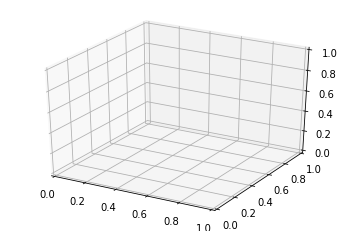

In [102]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.gca(projection='3d')

t = np.linspace(-80 * np.pi, 80 * np.pi, 1000)

z = 0.001*t/(2*pi)
x = 0.045 * np.sin(t)
y = 0.045 * np.cos(t)

k=1000
#ax.quiver(X, Y, Z, U*k, V*k, P*k)
ax.quiver(X, Y, Z, U*k, V*k, P*k, length=0.01, normalize=True)

ax.view_init(elev=10., azim=20)

plt.show()

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = 0.001/(2*pi))*(np.linspace(-40*pi, 40*pi, 1000))
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


In [58]:
from sympy.physics.vector import ReferenceFrame
R = ReferenceFrame('R')
from sympy.physics.vector import gradient

t= Symbol('t')
k= Symbol('k')
a= Symbol('a')

#Variables
w = Symbol('omega') #Unico parametro de la curva


A=(a*w/k)*I*exp(-k*R[2])*exp(I*(k*R[0]-w*t))


In [59]:
REA=im(A)

In [60]:
V=gradient(REA,R)

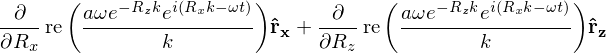

In [61]:
V

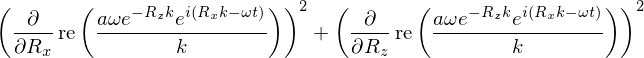

In [62]:
V.dot(V)